## 12.Transformer——注意力机制

**学习目标**

1. 了解注意力机制、缩放点积注意力、多头注意力和自注意力的概念

2. 了解掩蔽softmax函数实现

3. 了解缩放点积注意力的代码实现

4. 了解多头注意力的代码实现

****

2022 年 11 月，OpenAI 发布了 ChatGPT，迅速在产业界引起巨大波澜，自此，人工智能大模型时代拉开了序幕。ChatGPT 基于 **Transformer 架构**，具有强大的语言生成和理解能力。它能够模拟人类的对话方式，广泛应用于聊天、内容创作、编程辅助等领域。

1. 为什么要使用Transformer?

CNN在图像识别领域取得了令人瞩目的成就，如ResNet、YOLO等在图像分类、目标检测领域都非常成功。但是在自然语言处理领域，CNN表现的相当糟糕，以至于完全无法使用CNN来处理自然语言。而传统的RNN、LSTM等模型在处理长序列时表现不佳，原因是它们的记忆能力有限，只能记住最近的输入信息，而远距离的上下文信息则难以捕捉。Transformer模型的出现正好解决了这个问题，它通过自注意力机制解决了长序列建模的问题。

2. Transformer的编码器-解码器架构

Transformer 是一种深度学习模型，由 Vaswani 等人在 2017 年的论文《Attention Is All You Need》中首次提出。它在自然语言处理（NLP）领域取得了革命性的进展。

Transformer 模型主要由编码器（Encoder）和解码器（Decoder）两部分组成，每部分都由多个相同的层（Layer）堆叠而成。标准的 Transformer 通常包括 6 层编码器和 6 层解码器。编码器负责将输入序列转化为高维表示，解码器则根据这些表示生成输出序列。

<img src="./images/transformer.jpg" style="zoom:60%;" />

（1）每个编码器都包括两个子层：多头自注意力和前馈神经网络。每个子层后都应用了残差连接和层归一化。

（2）每个解码器包括以下三个子层：掩蔽多头自注意力、编码器-解码器注意力和前馈神经网络。同样，每个子层后也应用了残差连接和层归一化，以促进梯度流动和稳定训练。

多头注意力（Multi-Head Attention）：Transformer 通过多头注意力机制，允许模型同时从不同的表示子空间捕捉信息，增强了模型的表达能力。

位置编码（Positional Encoding）：由于 Transformer 模型本身不具备捕捉序列顺序的能力，因此引入了位置编码来提供序列中每个元素的位置信息。

层归一化（Layer Normalization）和残差连接（Residual Connections）：Transformer 使用层归一化和残差连接来促进深层网络的训练，防止梯度消失或爆炸问题。

Transformer 摒弃了传统的循环神经网络（RNN）结构，使用自注意力机制来捕捉序列内不同位置之间的依赖关系。这种机制允许模型同时处理序列中的所有元素，从而提高了计算效率。由于自注意力机制的特性，Transformer 可以并行处理序列中的所有元素，这与传统的序列模型（如 LSTM 或 GRU）相比，大大提高了训练速度。

因此，要想理解 Transformer 的工作原理，首先需要理解注意力机制。

3. 什么是注意力机制？

注意力机制（Attention Mechanism）是一种在深度学习中广泛使用的机制。视觉注意力机制是人类大脑的一种天生的能力，当我们看到一幅图片时，先是快速扫过图片，然后锁定需要重点关注的目标区域。当我们观察图片时，注意力很容易就集中在了人脸等位置。试想，如果每个局部信息都不放过，那么必然耗费很多精力，不利于人类的生存进化。

再举个简单的例子，假如你正在阅读一本有趣的小说，你的注意力并不是均匀地分布在每一字上。相反，你会根据当前的阅读目标，自动调整注意力的分配。当你读到关键情节或重要人物时，注意力会自动集中在这些部分。例如，当你读到“主角遇到了一位神秘黑衣人”时，你会特别关注“神秘黑衣人”这个词，因为它可能是后续情节的关键。对于一些不重要的细节，比如背景描述或次要人物的对话，你的注意力可能会减弱，甚至忽略。例如，当你读到“这家客栈的门很破旧”时，你可能不会特别关注门是否破旧，因为这并不影响你对故事的理解。你的注意力是动态变化的，随着阅读的进展，你会根据上下文和目标不断调整注意力的分配。例如，当你读到“神秘黑衣人递给主角一张纸条”时，你的注意力可能会从“神秘人”转移到“纸条”上，因为纸条的内容可能更重要。

在大语言模型中，注意力机制的工作方式与上述过程非常相似。它允许模型在处理输入时，动态地分配不同的权重（即注意力）给不同的部分。假设输入是一个文本序列，模型需要从中提取有用的信息，它会根据当前的任务（例如翻译、分类）计算每个输入部分的“重要性”，即注意力权重。这些权重反映了模型对每个部分的注意力分配。模型将输入的文本序列的每个部分乘以其对应的注意力权重，然后对这些加权后的值求和，得到一个“注意力向量”。这个向量是模型当前任务中最相关的信息。在不同的任务阶段，模型会根据上下文动态调整注意力权重，确保始终关注最重要的部分。

在实现上，注意力机制通常涉及计算一个查询（Query）、一组键（Key）和一组值（Value）之间的交互，然后根据这些交互生成加权的输出。

注意力机制的基本思想是，模型能够通过注意力机制来选择性地聚焦于输入序列中的特定部分，从而提高模型的性能和解释性。具体来说，注意力机制可以分为以下几个步骤：

（1）计算注意力权重：模型首先计算输入序列中每个元素与当前上下文的相关性，并将这些相关性作为权重分配给输入序列中的每个元素。

（2）应用注意力权重：模型将注意力权重应用于输入序列，以聚焦于与当前任务最相关的部分。

（3）生成输出：模型根据注意力权重生成输出，其中输出的选择性取决于输入序列中与当前上下文最相关的部分。



注意力机制的引入，为深度学习模型提供了一种强大的工具，以更有效地处理序列数据，特别是在需要考虑全局上下文信息的任务中。

下面我们就逐步构建出Transformer模型的核心组件——多头自注意力模块。

In [1]:
import math
import torch
from torch import nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

### 12.1  注意力可视化函数

为了更好的理解注意力机制，我们首先引入一个能够可视化注意力矩阵的函数。

In [2]:
# 定义一个函数，用于显示注意力的热图
def qk_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(8, 8), cmap='Reds'):
    # 获取矩阵的行数和列数
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    # 创建一个图形和一组子图轴
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, 
                                 sharey=True, squeeze=False)
    
    # 遍历每一行的子图轴和对应的矩阵
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        # print(i, row_axes, row_matrices)
        # 遍历每一行的子图轴和对应的矩阵
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            # print(j, ax, matrix)
            # 在子图轴上显示矩阵的热图
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            # 如果是最后一行，则设置x轴标签
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            # 如果是第一列，则设置y轴标签
            if j == 0:
                ax.set_ylabel(ylabel)
            # 如果提供了标题，则设置子图的标题
            if titles:
                ax.set_title(titles[j])
                
    # 为整个图形添加颜色条
    fig.colorbar(pcm, ax=axes, shrink=0.6)
    # 显示图形
    plt.show()

enumerate(zip(axes, matrices)) 是 Python 中的一种组合用法，用于同时遍历两个列表（或其他可迭代对象），并且还能获取每个元素的索引。

1. zip(axes, matrices) 作用：将两个可迭代对象 axes 和 matrices 配对组合。生成一个包含元组的迭代器，每个元组由 axes 和 matrices 中对应位置的元素组成。

示例1：

如果 axes = ['a1', 'a2']，matrices = [[1, 2], [3, 4]]，那么 zip(axes, matrices) 会生成 [('a1', [1, 2]), ('a2', [3, 4])]。

2. enumerate(...) 作用：为 zip(axes, matrices) 生成的每个元素添加一个索引。生成一个包含元组的迭代器，每个元组由索引和 zip(axes, matrices) 中的元素组成。

示例2：

如果 zip(axes, matrices) 生成 [('a1', [1, 2]), ('a2', [3, 4])]，那么 enumerate(zip(axes, matrices)) 会生成 [(0, ('a1', [1, 2])), (1, ('a2', [3, 4]))]。

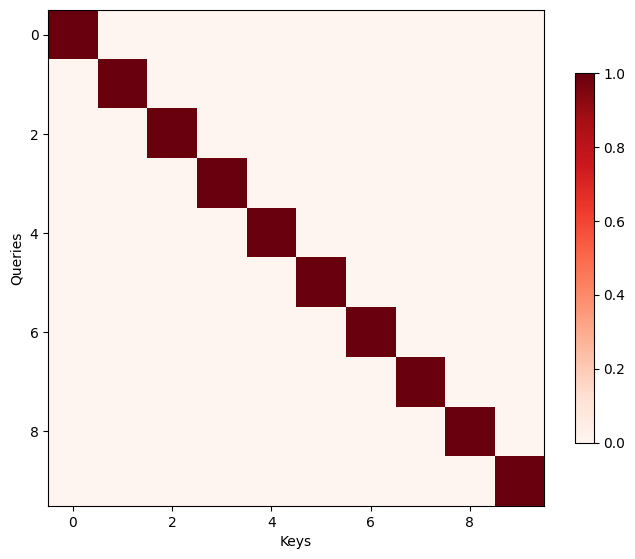

In [3]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
qk_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

### 12.2  缩放点积注意力

缩放点积注意力（Scaled Dot-Product Attention）是 Transformer 模型中的核心机制之一，用于计算输入序列中每个位置的注意力权重。它的公式如下：

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

其中：

- Q：查询矩阵（Query），形状为 $(n,d_k)$，表示 n个查询向量，每个向量的维度为 $d_k$。
- K：键矩阵（Key），形状为 $(m,d_k)$，表示 m个键向量，每个向量的维度为 $d_k$。
- V：值矩阵（Value），形状为 $(m,d_v)$，表示 m个值向量，每个向量的维度为 $d_v$。
- $d_k$：键和查询的维度。
- $\sqrt{d_k}$：缩放因子，用于防止点积结果过大。
- softmax：对每一行进行归一化，得到注意力权重。

下面我们来详细解释该公式：

首先，计算查询矩阵 Q和键矩阵 K的转置 $K^T$的点积。结果是一个形状为 (n,m)的矩阵，表示每个查询向量与每个键向量的相似度。

其次，将点积结果除以$\sqrt{d_k}$，目的是防止点积结果过大，导致 softmax 函数的梯度消失或爆炸。当 d较大时，点积结果的方差会增大，因此需要通过缩放来平衡。

然后，进行对缩放后的点积矩阵的每一行进行 softmax 归一化，得到注意力权重矩阵。每一行的值表示一个查询向量对所有键向量的注意力权重，且每一行的权重之和为 1。

最后，将注意力权重矩阵与值矩阵 V 相乘，得到最终的输出。计算结果是一个形状为 $(n,d_v)$的矩阵，表示每个查询向量对应的加权值向量。

根据分析可以得知，缩放点积注意力公式的作用是：

1. 计算查询向量与键向量的相似度。
2. 通过 softmax 归一化得到注意力权重。
3. 根据注意力权重对值向量进行加权求和，得到最终输出。

在该公式中，我们使用的softmax通常是一种被称为掩蔽softmax的函数，我们先来实现掩蔽softmax函数：

In [4]:
# 掩蔽softmax函数，用于在softmax操作中屏蔽无效的数据
def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作
        X:3D张量
        valid_lens:1D张量, valid_lens.shape == torch.Size([X.shape[0]])
        valid_lens:2D张量, valid_lens.shape == torch.Size([X.shape[0], X.shape[1]])
    """
    if valid_lens is None:
        return F.softmax(X, dim=-1)
    
    shape = X.shape
    
    if valid_lens.dim() == 1:
        valid_lens = torch.repeat_interleave(valid_lens, shape[1])
    else:
        valid_lens = valid_lens.reshape(-1)

    X = X.reshape(-1, shape[-1])
    # 将序列arange_X与valid_len进行比较，生成一个布尔类型的掩码
    mask = torch.arange((X.size(-1)), dtype=torch.float32, device=X.device)[None, :] < valid_lens[:, None]
    # print(f'MASK:\n{mask} \n X:\n{X}')
    X[~mask] = -1e6
    
    # 对掩蔽后的X应用softmax
    return F.softmax(X.view(shape), dim=-1)

X[~mask]是一种高级索引（advanced indexing）的形式，用于根据布尔掩码 mask 从张量 X 中选择元素。这里的 ~ 操作符表示对 mask 进行按位取反操作，从而选择 mask 中为 False 的位置对应的元素。

In [5]:
# 测试masked_softmax函数
X = torch.rand(3, 2, 6)
valid_lens = torch.tensor([1, 2, 3])

print('\n masked softmax:\n')
print(masked_softmax(X, valid_lens))


 masked softmax:

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.6006, 0.3994, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3635, 0.6365, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.2928, 0.2464, 0.4608, 0.0000, 0.0000, 0.0000],
         [0.3878, 0.2991, 0.3131, 0.0000, 0.0000, 0.0000]]])


在有了掩蔽softmax函数以后，我们就可以实现缩放点积注意力啦。

In [6]:
class DotProductAttention(nn.Module):
    def __init__(self, dropout):
        super(DotProductAttention, self).__init__()
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, queries, keys, values, valid_lens=None):
        # 查询、键和值的维度应相同
        d = queries.shape[-1]
        # 计算查询和键的点积，然后除以d的平方根进行缩放
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)
        # 应用掩蔽softmax获取注意力权重
        self.attention_weights = masked_softmax(scores, valid_lens)
        # 应用dropout并计算加权值
        return torch.bmm(self.dropout(self.attention_weights), values)

自注意力

自注意力是一种机制，用于计算序列中每个元素与其他元素之间的相关性（注意力权重），从而捕捉序列内部的依赖关系。自注意力的查询（queries）、键（keys）和值（values）都来自同一个输入张量。

In [7]:
class SelfAttention(nn.Module):
    def __init__(self, dropout):
        super(SelfAttention, self).__init__()
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, X, valid_lens=None):
        """
        自注意力前向传播。

        参数:
        - X: 输入张量，形状为 (batch_size, seq_len, d_model)。
        - valid_lens: 有效长度张量，形状为 (batch_size,) 或 (batch_size, seq_len)。

        返回:
        - 输出张量，形状为 (batch_size, seq_len, d_model)。
        """
        # 查询、键和值都来自输入 X
        queries = X
        keys = X
        values = X

        # 计算查询和键的点积，然后除以 d 的平方根进行缩放
        d = queries.shape[-1]
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(d)

        # 应用掩蔽 softmax 获取注意力权重
        self.attention_weights = masked_softmax(scores, valid_lens)

        # 应用 dropout 并计算加权值
        return torch.bmm(self.dropout(self.attention_weights), values)

测试自注意力

输入形状: torch.Size([2, 13, 512])
输出形状: torch.Size([2, 13, 512])


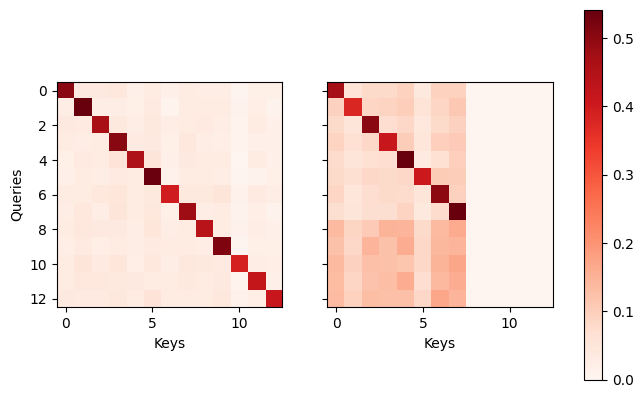

In [8]:
# 参数设置
batch_size = 2
seq_len = 13
d_model = 512
dropout = 0.1

# 初始化自注意力层
self_attn = SelfAttention(dropout)
self_attn.eval()

# 输入张量 (batch_size, seq_len, d_model)
X = torch.rand(batch_size, seq_len, d_model)

# 有效长度 (batch_size,)
valid_lens = torch.tensor([13, 8])  # 第一个样本有效长度为 13，第二个样本有效长度为 8

# 前向传播
output = self_attn(X, valid_lens)

print("输入形状:", X.shape)
print("输出形状:", output.shape)

# 使用show_heatmaps函数显示注意力权重的热图
qk_heatmaps(self_attn.attention_weights.reshape((1, 2, 13, 13)), xlabel='Keys', ylabel='Queries')

### 12.3  多头注意力

多头注意力是一种多层次的注意力机制，它允许模型在多个不同的表示子空间中并行地学习信息。这可以提高模型捕获不同类型信息的能力。多头注意力是对自注意力的一种扩展，它通过并行运行多个自注意力机制（称为“头”），并将它们的结果拼接或加权组合，从而捕捉更丰富的特征。因此多头注意力的每个头本质上是一个自注意力机制。

（1）用于变换查询、键、值的形状以适应多头注意力的函数

In [9]:
# 用于变换查询、键、值的形状以适应多头注意力
def transpose_qkv(X, num_heads):
    batch_size, seq_len, d_model = X.shape
    head_dim = d_model // num_heads
    X = X.reshape(batch_size, seq_len, num_heads, head_dim)
    X = X.permute(0, 2, 1, 3)
    X = X.reshape(-1, seq_len, head_dim)
    
    return X

（2）用于变换多头注意力的输出形状的函数

In [10]:
# 将多头输出变换回原始形状
def transpose_output(X, num_heads):
    batch_size_num_heads, seq_len, head_dim = X.shape
    batch_size = batch_size_num_heads // num_heads
    
    X = X.reshape(batch_size, num_heads, seq_len, head_dim)
    X = X.permute(0, 2, 1, 3)
    X = X.reshape(batch_size, seq_len, -1)
    
    return X

（3）多头自注意力的实现

In [11]:
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout):
        super(MultiHeadSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.head_dim = d_model // num_heads
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        # 线性变换层
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        # 输出线性变换层
        self.W_o = nn.Linear(d_model, d_model)

        # Dropout 层
        self.dropout = nn.Dropout(dropout)

    def forward(self, X, valid_lens=None):
        batch_size, seq_len, d_model = X.shape

        # 线性变换并分头
        queries = transpose_qkv(self.W_q(X), self.num_heads)  # (batch_size * num_heads, seq_len, head_dim)
        keys = transpose_qkv(self.W_k(X), self.num_heads)     # (batch_size * num_heads, seq_len, head_dim)
        values = transpose_qkv(self.W_v(X), self.num_heads)   # (batch_size * num_heads, seq_len, head_dim)

        # 计算点积注意力
        scores = torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(self.head_dim)  # (batch_size * num_heads, seq_len, seq_len)
        attention_weights = masked_softmax(scores, valid_lens)  # (batch_size * num_heads, seq_len, seq_len)
        self.att_map = attention_weights
        
        # 加权求和
        attention_output = torch.bmm(self.dropout(attention_weights), values)  # (batch_size * num_heads, seq_len, head_dim)

        # 恢复形状
        attention_output = transpose_output(attention_output, self.num_heads)  # (batch_size, seq_len, d_model)

        # 输出线性变换
        output = self.W_o(attention_output)  # (batch_size, seq_len, d_model)
        return output


（4）多头自注意力测试

X.shape: 
torch.Size([2, 13, 512]) 

多头自注意力的形状：
torch.Size([2, 13, 512])


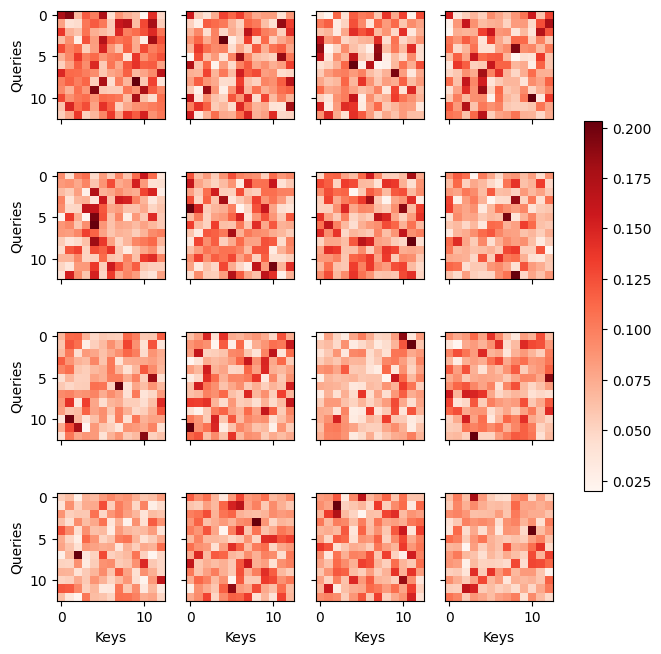

In [12]:
batch_size = 2
seq_len = 13
d_model = 512
num_heads = 8

attention = MultiHeadSelfAttention(d_model, num_heads, dropout=0.1)
attention.eval()

# 创建查询和键值对的随机数据
X = torch.randn(batch_size, seq_len, d_model)
print(f'X.shape: \n{X.shape} \n')

# 打印多头自注意力输出的形状
mul_att_shape = attention(X).shape
print(f'多头自注意力的形状：\n{mul_att_shape}')

qk_heatmaps(attention.att_map.reshape((4, 4, 13, 13)), xlabel='Keys', ylabel='Queries')